# Sympy, Numpy, Matplotlib, Scienceplots

In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s = smp.symbols('x y t n a b C c r u s')
f, g, m = smp.symbols('f g m', cls=smp.Function)

c:\Users\bense\anaconda3\envs\Jupyter_Notebooks\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\bense\anaconda3\envs\Jupyter_Notebooks\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\bense\anaconda3\envs\Jupyter_Notebooks\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Problem Set Mod 1

Q1

In [2]:
# y' = y + 20e^(-x)
# y = 4e^(x) - 10e^(-x)

y = 4*smp.exp(x) - 10*smp.exp(-x)
y_prime = smp.diff(y, x)

# If diff_eq == 0, then LHS == RHM
diff_eq = y_prime - (y + 20*smp.exp(-x))
diff_eq

# y' = y + 20e^(-x)
# The RHS can be simplified to equal the LHS, which means y is a solution to this diff. eq. 

0

Q2

In [5]:
# y' + 7y = 0
# y(x) = Ce^(-7x)
# y(0) = 3

# Define y and find y'
y = C * smp.exp(-7*x)
y_prime = smp.diff(y, x)
lhs = y_prime + 7*y

# y(0) = 3
init_cond = y.subs(x, 0)
C_val = smp.solve(smp.Eq(init_cond, 3), C)[0]
lhs

0

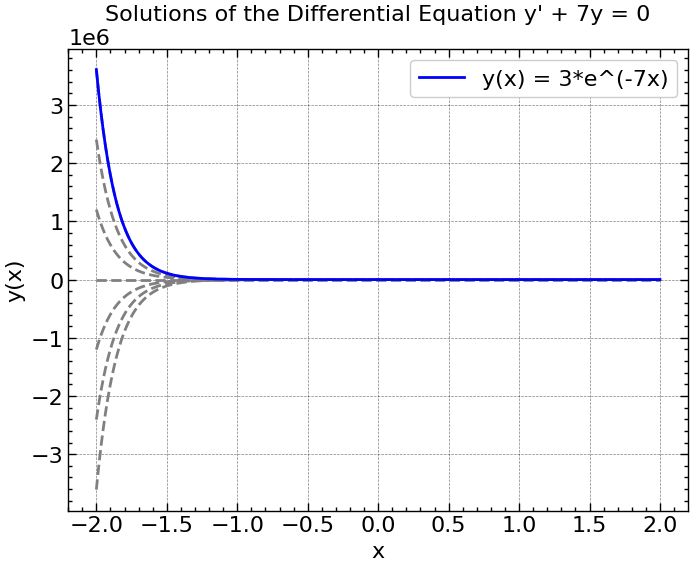

In [6]:
x_values = np.linspace(-2, 2, 1000)

for i in range(-3, 4):
    y_values = i * np.exp(-7 * x_values)
    plt.plot(x_values, y_values, linestyle='dashed', color='gray')

y_values_with_initial_condition = C_val * np.exp(-7 * x_values)
plt.plot(x_values, y_values_with_initial_condition, color='blue', linewidth=2, label=f"y(x) = {C_val}*e^(-7x)")

plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solutions of the Differential Equation y\' + 7y = 0')
plt.legend()
plt.grid(True)
plt.show()

Q3

In [7]:
# dy/dx = 3/x**4
# y(1) = 2

dydx = 3/x**4
y = smp.integrate(dydx, x)
# Add C
y += C

y_1 = y.subs(x, 1)
C_val = smp.solve(smp.Eq(y_1, 2), C)[0]

y = y.subs(C, C_val)
y

3 - 1/x**3

Q3 - 2

In [8]:
# dydx = 6/x**4
# y(1) = 6

dydx = 6/x**4
y = smp.integrate(dydx, x)
y += C

y_1 = y.subs(x, 1)
C_val = smp.solve(smp.Eq(y_1, 6), C)[0]

y = y.subs(C, C_val)
y

8 - 2/x**3

Q4

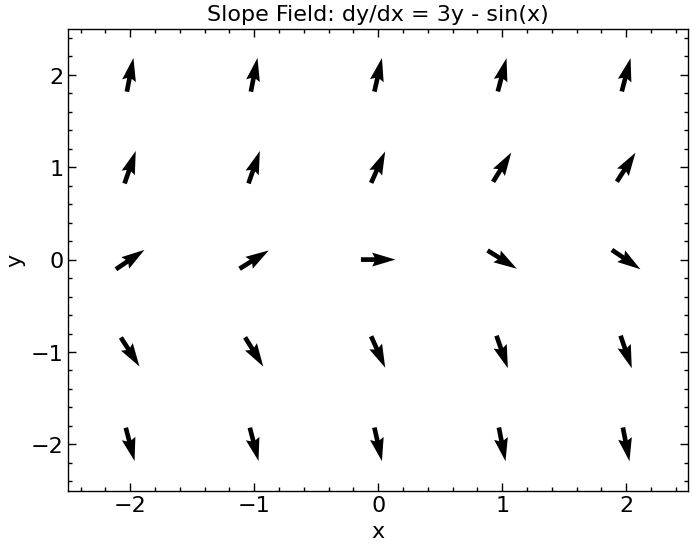

In [10]:
# Construct a slope filed for diff. eq. 
# x, y = -2, -1, 0, 1, 2
# dy/dx = 3y - sin(x)

def slope(x, y):
  return 3*y - np.sin(x)

# Meshgrid
x_vals = np.linspace(-2, 2, 5)
y_vals = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x_vals, y_vals)

# U and V are horiz/vert components of the slopes
# U = 1 means the horiz component is constand and equal to 1 for all points
# V takes slope and X/Y as inputs and returns array
# U and V define slope of the line segments in the slope filed
U = 1
V = slope(X, Y)

# N = magnitude (length) of the slope vectors (u, v) at each point (x, y)
# Calculate magnitude by finding square root of the sum of the squares of U and V
N = np.sqrt(U**2 + V**2)

# Normalize slope vectors by dividing U and V by magnitude N
U /= N
V /= N

plt.quiver(X, Y, U, V, angles='xy', pivot='mid')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Slope Field: dy/dx = 3y - sin(x)')
plt.grid()
plt.show()

Q5

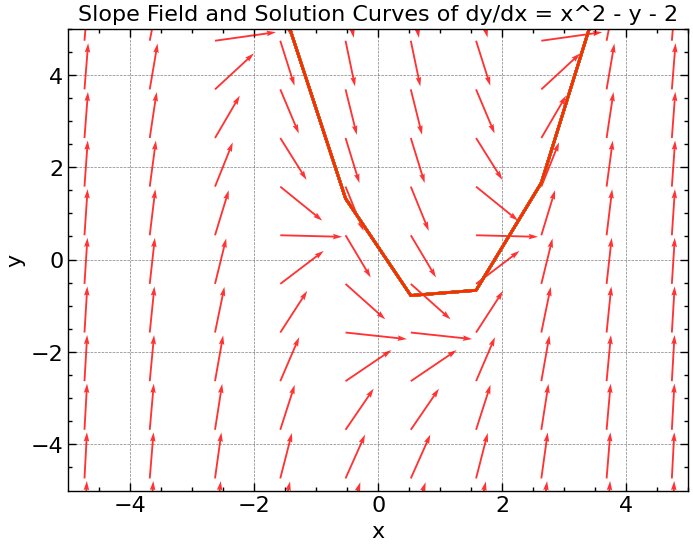

In [11]:
def slope(x, y):
    return x**2 - y - 2

x = np.linspace(-10, 10, 20)
y = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x, y)

U = 1
V = slope(X, Y)

N = np.sqrt(U**2 + V**2)
U /= N
V /= N

# Define additional initial points
initial_points =  [(-2, 2), (-1, 2), (0, 2), (1, 2), (2, 2),
                  (-2.5, -2), (-1.5, -2), (-0.5, -2), (0.5, -2), (1.5, -2), (2.5, -2)]


# Plot the slope field
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='r', alpha=0.8)

# Plot solution curves for each initial point
for x0, y0 in initial_points:
    sol = solve_ivp(slope, (x.min(), x.max()), [y0], t_eval=x)
    plt.plot(sol.t, sol.y[0], linewidth=2, label=f'Solution Curve ({x0}, {y0})')

# Mark the additional initial points
for x0, y0 in initial_points:
    plt.plot(x0, y0, 'green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Slope Field and Solution Curves of dy/dx = x^2 - y - 2')
#plt.legend()
plt.grid(True)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Q6

Wehn solving a 1st Order Linear DE or a 1st Order Separable DE, the process of solving involves multiplying by an integrating factor or directly integrating both sides of the equation. 

y(x) = C * g(x)

In [12]:
# Find the explicit general solution
# (25 - x**2) (dy/dx) = 10*y

x = smp.Symbol("x")

P_x = 10 / (25 - x**2)

smp.exp(smp.integrate(P_x, x))
# Ans = C * ((x+5)/(x-5))

(x + 5)/(x - 5)

In [13]:
# Find the explicit general solution
# (9 - x**2) (dy/dx) = 6*y

P_x = 6 / (9 - x**2)

smp.exp(smp.integrate(P_x, x))
# Ans = C * ((x+3)/(x-3))

(x + 3)/(x - 3)

Q7

In [16]:
# Pop = 23000 in 1940, 27000 in 1960. Assuing exponential growth rate remains constant, what will pop be in 2000?

P0 = 23000
P1 = 27000
t1 = 20 # years b/t P0 and P1

gr = smp.log(P1 / P0) / t1 # Equation for growth rate

t2 = 60 # years b/t P1 and P2
P2 = P0 * smp.exp(r * t2)
P2

23000*exp(60*r)

Q8

In [30]:
# Find the general solution, then use the initial condition to find corresponding particular solution

# (dy/dx) + 5xy = 8x
# y(0) = 6

x = smp.symbols('x')
y = smp.symbols('y', cls=smp.Function)

# Initial conditions
y_0 = 6
x_0 = 0

# Define diff_eq (dy/dx) + 5xy = 8x
diff_eq = smp.Eq(y(x).diff(x) + 5*x*y(x), 8*x)

# Solve diff_eq
sol = smp.dsolve(diff_eq, y(x))

# General Solution
# Use info from diff_eq to set up y_gen
y_gen = C*smp.exp(-5/2*x**2) + (8/5)

# Particular Solution
# {C: y_0 - (8/5)} = dictionary specifying substitution to be made. Replaces C w/ expression that will make the particular solution satisfy y(0)
part_sol = y_gen.subs({C: y_0 - (8/5)})

part_sol

1.6 + 4.4*exp(-2.5*x**2)

In [31]:
# Find the general solution, then use the initial condition to find corresponding particular solution

# (dy/dx) + 5*x*y = 8*x
# y(0) = -6

# Initial Conditions
y_0 = -6
x_0 = 0

# Define diff_eq (dy/dx) + 5*x*y = 8*x
diff_eq = smp.Eq(y(x).diff(x) + 5*x*y(x), 8*x)

# Solve diff_eq
sol = smp.dsolve(diff_eq, y(x))

# General Solution
y_gen = C*smp.exp((-5/2)*x**2) + (8/5)

# Particular Solution
part_sol = y_gen.subs({C: y_0 - (8/5)})

part_sol

1.6 - 7.6*exp(-2.5*x**2)

Q9

1. (x + 6y)(y') = x - y
2. (x + 6y)(dy/dx) = x - y
3. (x + 6y)(dy) = (x - y)(dx)

4. (x + 6y)(dy) + (-x + y)(dx) = 0

5. smp.integrate((-x + y), x) + g(y)
6. [5] = ((-x**2)/2) + xy + g'(y)

7. smp.integrate((x + 6y), y) + g(y)
8. [7] = xy + 3y**2 + g'(y)

9. g'(y) = 6y
10. smp.integrate(6y, y)

In [80]:
# (x + 6y)(dy) + (-x + y)(dx) = 0

M = (x + 6*y)
N = (-x + y)

display(smp.integrate(M, y))
display(smp.integrate(N, x))

display(smp.integrate(6*y, y))

# (-x**2/2) + xy + 3y**2 = 0

# Ans = 
# x**2 - 2xy - 6y**2 = C

x*y + 3*y**2

-x**2/2 + x*y

3*y**2

In [9]:
# FIXME

M = x - y
N = -x - 6*y

# Check the exactness
dM_dy = smp.diff(M, y)
dN_dx = smp.diff(N, x)

exact = dM_dy == dN_dx
print("Is the differential equation exact? ", exact)

# Integrate M with respect to x
F_x = smp.integrate(M, x)

# Integrate N with respect to y
F_y = smp.integrate(N, y)

# Subtract the two integrals and add the arbitrary function of y
F = F_x - F_y + smp.Function('C')(y)

# Rearrange the equation to the form F(x, y) = C
F = smp.Eq(F, smp.Function('C')(y))

# Simplify the equation and multiply by -2 to match the given answer

F

Is the differential equation exact?  True


Eq(x**2/2 + 3*y**2 + C(y), C(y))

Q10

In [31]:
# Verify this diff eq is exact/solve:
# (12*x**2 + 4*y**2) (dx) + (8*x*y + 6*y**2) (dy) = 0

# Initial Conditions

M = (12*x**2 + 4*y**2)
N = (8*x*y + 6*y**2)

# Finding Exactness:

# Find derivative w/ respect to y for M
dM_dy = smp.diff(M, y)
# Find derivative w/ respect to x for N
dN_dx = smp.diff(N, x)
# *** Both equal to 8*y *** #


# Solve:
###
# Since we have an exact equation:
# ∃F, such that (∂f/∂x) = 12*x**2 + 4*y**2, (∂f/∂y) = 8*x*y + 6*y**2

# f(x, y)
M_int = smp.integrate(M, x) # = 4*x**3 + 4*x*y**2 + g(y) where g(y) = arbitrary function of y

# Now take derivative w/ respect to other variable
smp.diff(M_int, y) # = 8*x*y + g'(y)

# Therefore, g'(y) = 6*y**2
# Integrate:
gprime = smp.integrate(6*y**2, y)

# f(x, y) = (x**2)*(y**2) - 4*x + 3*y = C

# Ans = 
(M_int + gprime) / 2 # = C

2*x**3 + 2*x*y**2 + y**3

Q10 - 2

In [19]:
# Verify this diff eq is exact/solve:
# (9*x**2 + 8*y**2) (dx) + (16*x*y + 12*y**2) (dy) = 0

# Initial Conditions

M = 9*x**2 + 8*y**2
N = 16*x*y + 12*y**2

# Finding Exactness:

# Find derivative w/ respect to y for M
dM_dy = smp.diff(M, y)
# Find derivative w/ respect to x for N
dN_dx = smp.diff(N, x)
# *** Both equal to 4*x*y *** #


# Solve:

# Since we have an exact equation:
# ∃F, such that (∂f/∂x) = 9*x**2 + 8*y**2, (∂f/∂y) = 16*x*y + 12*y**2

# f(x, y)
M_int = smp.integrate(M, x) # = 3*x**3 + 8*x*y**2 + g(y) where g(y) = arbitrary function of y

# Now take derivative w/ respect to other variable
smp.diff(M_int, y) # = 16*x*y + g'(y)

# Therefore, g'(y) = 12*y**2
# Integrate:
gprime = smp.integrate(12*y**2, y)

# f(x, y) = (x**2)*(y**2) - 4*x + 3*y = C

# Ans = 
M_int + gprime # = C

3*x**3 + 8*x*y**2 + 4*y**3

Extras

In [59]:
x = smp.symbols('x')
f = smp.Function('f')(x)

diffeq = Eq(f.diff(x, x) - 5*f, 0)

display(diffeq)
dsolve(diffeq, f)

Eq(-5*f(x) + Derivative(f(x), (x, 2)), 0)

Eq(f(x), C1*exp(-sqrt(5)*x) + C2*exp(sqrt(5)*x))

In [22]:
# Verify this diff eq is exact/solve:
# (2*x*y**2 - 4) (dx) + (2*x**2*y + 3) (dy) = 0

# Initial Conditions

M = (2*x*y**2 - 4)
N = (2*x**2*y + 3)

# Finding Exactness:

# Find derivative w/ respect to y for M
dM_dy = smp.diff(M, y)
# Find derivative w/ respect to x for N
dN_dx = smp.diff(N, x)
# *** Both equal to 4*x*y *** #


# Solve:

# Since we have an exact equation:
# ∃F, such that (∂f/∂x) = 2*x*y**2 - 4, (∂f/∂y) = 2*x**2*y + 3

# f(x, y)
M_int = smp.integrate(M, x) # = (x**2)(y**2) - 4*x + g(y) where g(y) = arbitrary function of y

# Now take derivative w/ respect to other variable
smp.diff(M_int, y) # = 2*x**2*y + g'(y)

# Therefore, g'(y) = 3
# Integrate:
gprime = smp.integrate(3, y)

# f(x, y) = (x**2)*(y**2) - 4*x + 3*y = C

# Ans = 
M_int + gprime # = C

x**2*y**2 - 4*x + 3*y

In [154]:
# Find the general solution

# (dy/dx) = x + x*y**2
# dy = x*(1 + y**2)*(dx)
# (1/1+y**2)(dy) = x(dx)

dy_y = (1 / (1 + y**2))
dx_x = x

# Integrate both sides
lhs = smp.integrate(dy_y, y) # atan(y)
rhs = smp.integrate(dx_x, x) # (x**2/2)

# Multiply tan to both sides to solve for y
smp.tan(rhs) # + C

tan(x**2/2)